# Principe de l'argument de Cauchy

Ce notebook permet de tracer l'image d'un contour du plan complexe par une fonction de transfert quelconque. Le but est de vérifier **le principe de l'argument de Cauchy** en partant de cas simples. **Ce principe est à la base du critère de Nyquist qui permet
d'étudier la stabilité des systèmes asservis.**

<img src="fig/nyquist_cauchy-chap_stab-ext.png" width=600>

Le module qui s'occupe explicitement de calculer et tracer les contours d'origine et image se trouve dans le fichier `cauchy_main.py`. Ici nous allons simplement importer les fonctions les plus importantes et apprendre à les manipuler.

L'importation du module se fait par l'instruction suivante:

In [2]:
from ftransfert import Ftransfert

La classe `Ftransfert` permet de définir une fonction de transfert. Celle-ci sera simplement définie 
par son gain $k$, ses pôles $p_i$ et ses zéros $z_i$.

$$
F(p)=k\dfrac{(p-z_1)(p-z_2)(p-z_3)\ldots}{(p-p_1)(p-p_2)(p-p_3)\ldots}
$$

La définition d'une fonction de transfert se fait par l'instuction suivante:
```python
zeros=[(1,0)]  
poles=[(-1,0),(-2,0)]
gain=0.25
F=Ftransfert(zeros=zeros,poles=poles,gain=gain)
```
où `zeros` et `poles` sont des listes de nombre complexe.
Un segment de points est une liste de nombres complexes modélisés par un tuple de deux éléments `(réel,imaginaire)`.

In [3]:
zeros=[]  
poles=[(-1,0),(-2,0)]
gain=6
F=Ftransfert(zeros=zeros,poles=poles,gain=gain)
print(repr(F))
print(str(F))

Ftranfert(zeros=[],poles=[(-1, 0), (-2, 0)],gain=6,name="F")

            6
F(p) = ----------
       (p+1)(p+2)



Pour tracer le diagramme de Nyquist on utilisera la méthode suivante :

************************************************************
Nyquist plot : F(p)
Pulsation pas : 0.01
Interval des pulsations -20.48 20.48
Nombre de points 4096

            6
F(p) = ----------
       (p+1)(p+2)

************************************************************



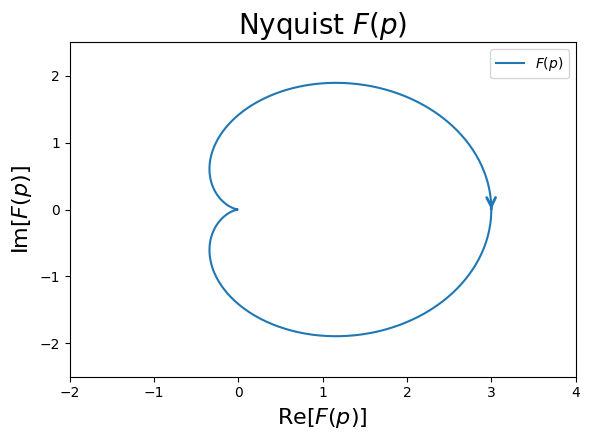

In [4]:
import matplotlib.pyplot as plt 
F.nyquist(labels=r"$F(p)$",xlim=(-2,4),ylim=(-2.5,2.5),n=4096,dw=0.01)

# Contour dans le plan complexe
Le module est accompagné de quelques fonctions pour tracer des figures de contour simple.

In [5]:
from contour import rectangle,circle,plot_contour

Commençons par définir un contour de la forme d'un rectangle en définissant deux coins de coordonnées
`A=(-1.5,-1)` et `B=(-0.5,1)` à l'aide de la fonction rectangle.
Celle-ci retourne une liste de quatre liste Python de 64 points chacuns (valeur par défaut: 128). 

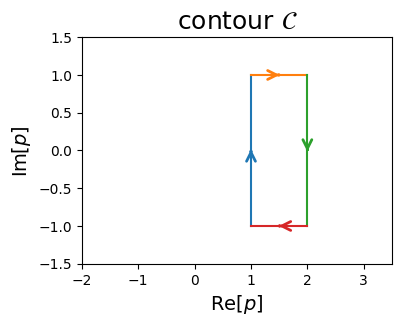

In [6]:
C1=rectangle((1,-1),(2,1),npts=64)
plot_contour(C1,xlim=(-2,3.5),ylim=(-1.5,1.5))

On peut également définir le même contour mais parcouru dans le sens contraire (ici le sens trigonométrique). 
Nous nommerons ce contour `C1_inv`

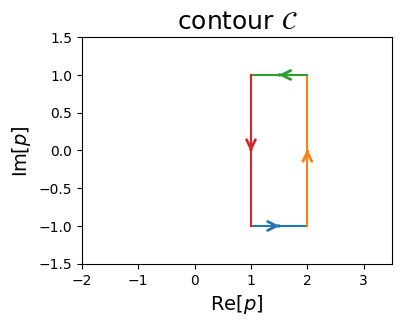

In [7]:
C1_inv=rectangle((1,-1),(2,1),npts=64,inverse=True)
plot_contour(C1_inv,xlim=(-2,3.5),ylim=(-1.5,1.5))

# Image d'un contour par une fonction de transfert

## Fonction de transfert avec un seul zéro
Déterminons maintenant l'image de ces contours par une fonction de transfert composée d'un seul zéro ($z_1=-1$).

$$
F_1(p)=(p+1)
$$



In [8]:
poles=[]
zeros=[(-1,0)]
gain=1
F_1=Ftransfert(zeros=zeros,poles=poles,gain=gain,name="F_1")

### Contour ne contenant pas le zéro parcouru 
#### ... dans le sens horaire

************************************************************
Cauchy plot : contour C1

F_1(p) = (p+1)           

************************************************************



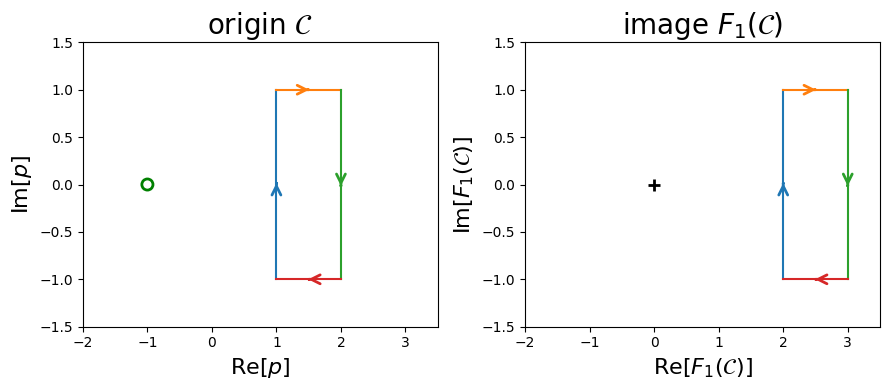

In [9]:
F_1.cauchy(C1,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1")

#### ... Dans le sens trigonométrique

In [ ]:
F_1.cauchy(C1_inv,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1 (inverse)")

(La carte des pôles et zéros de la fonction de transfert sera toujours représentée sur le graphe de gauche. Sur le graphe de droite c'est l'origine du plan qui sera toujours représentée par un '+'.)

Nous constatons que l'image du contour par une telle fonction de transfert est simplement translatée d'une distance égale à la distance entre le point du contour et la position du zéro. **Nous observons également que le sens de parcours du contour de l'image n'est pas modifié.**

### Contour contenant le zéro
On se donne un deuxième contour `C2` qui contient le zéro de la fonction de transfert test.

In [15]:
C2=rectangle((-1.5,-1),(-0.5,1),npts=64)
C2_inv=rectangle((-1.5,-1),(-0.5,1),npts=64,inverse=True)

************************************************************
Cauchy plot : contour C2

F_1(p) = (p+1)           

************************************************************



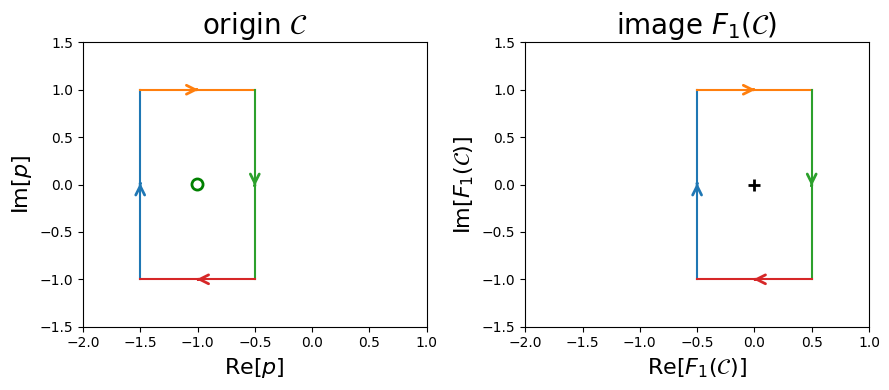

In [16]:
F_1.cauchy(C2,xlim=(-2,1),ylim=(-1.5,1.5),contourLabel="C2")

In [ ]:
F_1.cauchy(C2_inv,xlim=(-2,1),ylim=(-1.5,1.5),contourLabel="C2 (inverse)")

**Ici le contour $\mathcal{C}$ contient le zéro de la fonction de transfert. 
Nous observons que le contour image contient l'origine (et est orienté dans le même sens que le contour origine).**
## Fonction de transfert avec deux zéros

Traçons maintenant le résultat pour une fonction de transfert possédant deux zéros ($z_1=-1$ et $z_2=-0.75$):

$$
F_2(p)=\dfrac{1}{4}(p+1)(p+0.75).
$$

### Contour contenant pas les zéros

In [ ]:
zeros=[(-1,0),(-0.75,0)]
poles=[]
gain=0.25
F_2=Ftransfert(zeros=zeros,poles=poles,gain=gain,name="F_2")

In [ ]:
F_2.cauchy(C1,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1")

In [ ]:
F_2.cauchy(C1_inv,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1 (inverse)")

**On observe comme précédemment que si le contour ne contient pas les zéros de la fonction de transfert, l'image de celui-ci ne fait aucun tour autour de l'origine.** 

###  Contour contenant les deux zéros

Dans cet exemple, nous allons utiliser un nouveau contour de la forme d'un cercle.

In [ ]:
C3=circle(center=(-1,0),radius=0.75)
C3_inv=circle(center=(-1,0),radius=0.75,inverse=True)

In [ ]:
F_2.cauchy(C3,xlim=[(-1.9,1.0),(-0.3,0.3)],ylim=[(-1,1),(-0.25,0.25)],contourLabel="C1")

In [ ]:
F_2.cauchy(C3_inv,xlim=[(-1.9,1.0),(-0.3,0.3)],ylim=[(-1,1),(-0.25,0.25)],contourLabel="C1 (inverse)")

Si le contour contient deux zéros, l'image par la fonction de transfert fait deux tours autour de l'origine. Plus généralement, **si le contour contient un nombre $Z$ de zéros, l'image par la fonction de transfert du contour fait $Z$ tours autour de l'origine dans le même sens.**
## Fonction de transfert possédant un pôle
Nous allons maintenant observer le comportement de ces tracés pour différents contours dans le cas où la fonction de transfert présente un pôle, notamment avec :

$$
F_3(p)=\dfrac{6}{p+1}
$$

### Contour ne contenant pas le pôle

In [11]:
zeros=[]
poles=[(-1,0)]
gain=6
F_3=Ftransfert(zeros=zeros,poles=poles,gain=gain,name="F_3")

In [ ]:
F_3.cauchy(C1,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1")

In [ ]:
F_3.cauchy(C1_inv,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1 (inverse)")

Nous remarquons tout d'abord que le contour image ne contient pas l'origine du plan complexe. De plus
le contour image est parcouru dans le même sens que le contour origine

### Contour contenant le pôle

************************************************************
Cauchy plot : contour C1

           6
F_3(p) = -----
         (p+1)

************************************************************



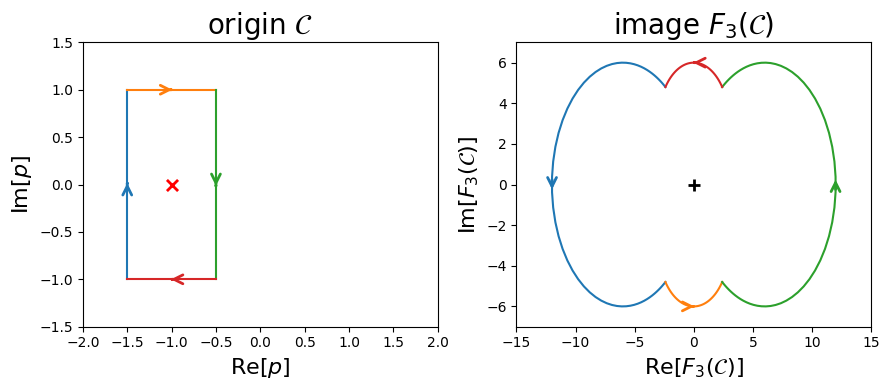

In [14]:
F_3.cauchy(C2,xlim=[(-2,2),(-15,15)],ylim=[(-1.5,1.5),(-7,7)],contourLabel="C1")

In [ ]:
F_3.cauchy(C2_inv,xlim=[(-2,2),(-15,15)],ylim=[(-1.5,1.5),(-7,7)],contourLabel="C1 (inverse)")

**Nous remarquons que l'image du contour contient l'origine dans le sens opposé celui du contour d'origine.**
Nous allons procédé de la même manière avec une fonction de transfert possédant deux pôles.

$$
F_4(p)=\dfrac{6}{(p+1)(p+0.75)}
$$

### Contour ne contenant pas les pôles

In [ ]:
zeros=[]
poles=[(-1,0),(-0.75,0)]
gain=6
F_4=Ftransfert(zeros=zeros,poles=poles,gain=gain,name="F_4")

In [ ]:
F_4.cauchy(C1,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1")

In [ ]:
F_4.cauchy(C1_inv,xlim=(-2,3.5),ylim=(-1.5,1.5),contourLabel="C1 (inverse)")

Nous observons comme précédemment que le contour de l'image ne contient pas l'origine.

### Contour contenant les pôles

In [ ]:
F_4.cauchy(C3,xlim=[(-2,2),(-15,20)],ylim=[(-1.5,1.5),(-15,15)],contourLabel="C3")

In [ ]:
plt.show()
F_4.cauchy(C3_inv,xlim=[(-2,2),(-15,20)],ylim=[(-1.5,1.5),(-15,15)],contourLabel="C3 (inverse)")

**Si le contour contient un nombre $P$ de pôles, l'image par la fonction de transfert de
ce contour fait un nombre $P$ de tours autour de l'origine dans le sens opposé (à celui du contour).**
# Enoncé du principe de l'argument de Cauchy
On énonce alors le principe de Cauchy:

Si un contour $\mathcal{C}$ contient $Z$ zéros et $P$ pôles d'une fonction analytique $F(p)$ 
sans en traverser aucun, alors quand on le parcourt dans le sens anti-trigonométrique, le contour image par $F(p)$, $\Gamma=F(\mathcal{C})$ fait un nombre de tours $N$ autour de l'origine dans le sens trigonométrique égal à,

$$
    N=Z-P
$$

On vérifie le principe de Cauchy avec une fonction de transfert composé de cinq zéros et deux pôles.
Et un contour $\mathcal{C}$ qui ne contient que $Z=3$ zéros et $P=1$ pôle. On a donc $N=2$. Le signe négatif indique que le nombre de tours est dans le sens opposé au sens trigonométrique (lorque le contour d'origine tourne dans le sens horaire.

In [ ]:
zeros=[(-0.75,0.5),(-0.75,-0.5),(-1.65,0),(-2,1),(-2,-1)]
poles=[(-1,0),(-2.25,0)]
gain=0.75
F_5=Ftransfert(zeros=zeros,poles=poles,gain=gain,name="F_5")

In [ ]:
F_5.cauchy(C3,xlim=(-2.5,1.5),ylim=(-1.5,1.5))

In [ ]:
F_5.cauchy(C3_inv,xlim=(-2.5,1.5),ylim=(-1.5,1.5))